<a href="https://colab.research.google.com/github/ahmeda335/ContextCaching_GoogleGemini/blob/main/ContextCaching_GoogleGemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Context Caching*** 📑💾
## Is a tool Google put in Gemini API to enable us extract information from some text stored in a cache for a certain time without the need of inserting this text in my prompt each time I want to get information from.<br>

---


# Notes:<br>
### 🔔 Make sure that you don't put any personal information, or passwords in the code in the unpaid sessions, as Google uses it to improve its AI performance.
### 🔔 For paid models you can find pricing information here ---> https://ai.google.dev/pricing.
### 🔔 In context cashing, pricing depends on how large the caching file, TTL (Time To Live) in the cache, and other factors such as non-cached input tokens and output tokens.

🔔🔔🔔***Fill in The cells between the two lines to create your model and then go below there is another cell between two lines to put your questons there*** 🙂



---



In [1]:
# Here enter the name of the subject of the file, e.g. 'Book for learning Programming in Python'
subject_title = "Your Subject title"

# Time until the data will be removed from the cache, you can ask the model within this time. It is in minutes.
cache_time = 20

# The path of the file you want to cache.
# Note: the file must be not small such that it has over than 32768 tokens. To calculate it, there is cell under in the code which explain more.
file_path = 'Your file path, e.g. "file.txt"'  # You can use a text_fiel or a video_file also.

***Your Gemini-API-Key***<br>
✅ In the case of you are using colab, you can set your API-KEY in this way in the cell. If You are using any other development environment or cURL in the terminal it is preferred to put the API-KEY in an environment variable as shown in the next cell.<br>
✅ As I am using colab I will use the first method.<br><br>
You can get your Gemini API Key from here -->  https://aistudio.google.com/app/apikey

👇👇Put Your API-KEY here.<br>

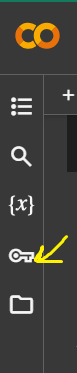

In [2]:
from google.colab import userdata
API_KEY = userdata.get('GEMINI-API-KEY')

✅ If you don't use google colab

In [3]:
# from dotenv import load_dotenv
# load_dotenv()

# !export GEMINI-API-KEY = <YOUR_API_KEY>   # Replace '<YOUR_API_KEY>' with you API-KEY. If you are using the terminal don't use '!' before 'export'.
# API_KEY = os.getenv('GEMINI-API-KEY')



---



✅ The Python SDK for the Gemini API to use Context Cashing is contained in the google-generativeai package.

In [4]:
!pip install -q -U google-generativeai

✅ Importing required libraries.

In [6]:
import os
import google.generativeai as genai
from google.generativeai import caching
import datetime
import time

In [7]:
genai.configure(api_key=API_KEY)

✅ Getting the text or video-file you want to cache.<br>
✅ Cached contents mustn't be less than 32768 tokens.

In [8]:
!pwd

/content


In [9]:
path_to_text_file = file_path

✅ Setting the model you will use.

In [10]:
model_name = 'models/gemini-1.5-flash-001'

✅ Uploading the loaded file to the API

In [11]:
text_file = genai.upload_file(path=path_to_text_file)

✅ Wait for the file to finish processing

In [12]:
while text_file.state.name == 'PROCESSING':
  print('Waiting for file to be processed.')
  time.sleep(2)
  text_file = genai.get_file(text_file.name)

print(f'File processing complete: {text_file.uri}')

Waiting for file to be processed.
Waiting for file to be processed.
Waiting for file to be processed.
Waiting for file to be processed.
File processing complete: https://generativelanguage.googleapis.com/v1beta/files/70odf8fhtmru


✅ ***Calculating*** the ***number of tokens*** in the file you want to cache.

In [13]:
### Text ###
# The number of tokens depends on the big of the text "Note: The token is not a word, it maybe a word or a subword, e.g. playing is a word but two tokens 'play', and 'ing'. The process of making tokens is called Tokenization."

### Image ###
# The number of tokens for image is fixed = 258 tokens, despite of the size of the image.

### Video ###
# The number of tokens for video is fixed = 263/second.

### Audio ###
# The number of tokens for audio is fixed = 32/second.

# For more information ---> https://ai.google.dev/gemini-api/docs/tokens?lang=python

# ------------------------------------------------------- #

# To get the number of tokens.
model = genai.GenerativeModel(model_name)
print("total_tokens: ", model.count_tokens(text_file))

# There is another way, using 'response.usage_metadata' after creating the response, as shown later in the notebook.

total_tokens:  total_tokens: 335120



✅ Here I initialize the ***Cache*** with ttl = 5 minutes.<br>
✅ TTL ---> (Time To Live) is the time that the loaded file will remain in the cache before it is deleted. The default value is 1 hour, and there is no limit above.

In [14]:
cache = caching.CachedContent.create(
    model=model_name,
    display_name= subject_title, # 'Small description of the text_file, e.g. "Book to learn programming in Python"', # used to identify the cache
    system_instruction=(
        'You are an expert video analyzer, and your job is to answer '
        'the user\'s query based on the file you have access to.'
    ),
    contents=[text_file],
    ttl=datetime.timedelta(minutes=cache_time),
)

In [15]:
# Construct a GenerativeModel which uses the created cache.
model = genai.GenerativeModel.from_cached_content(cached_content=cache)



---



In [28]:
question = "Your Quesiton" # Write your quextion here and then run the next cell to run the answer



---



In [29]:
# Query the model
response = model.generate_content([question])

# Printing the answer.
print(response.text)

The initial functions are `pygame.init()`, `pygame.display.set_mode(SCREEN_WIDTH, SCREEN_HEIGHT)`, and `pygame.display.set_caption("Shooter")`. 



In [ ]:
print(response.usage_metadata) # Number of tokens for the prompt

✅ It's not possible to retrieve or view cached content, but you can retrieve cache metadata (name, model, display_name, usage_metadata, create_time, update_time, and expire_time).



In [40]:
for c in caching.CachedContent.list():
  print(c)

CachedContent(
    name='cachedContents/mjbls3740ion',
    model='models/gemini-1.5-flash-001',
    display_name='Religious Question',
    usage_metadata={
        'total_token_count': 56373,
    },
    create_time=2024-08-15 07:43:39.696457+00:00,
    update_time=2024-08-15 07:43:39.696457+00:00,
    expire_time=2024-08-15 07:48:37.923305+00:00
)


#### Update a Cache
✅ You can set a new ttl or expire_time for a cache. Changing anything else about the cache isn't supported.

In [41]:
# cache.update(ttl=datetime.timedelta(minutes=10))

#### Delete a Cache

In [27]:
# cache.delete()